In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
traindata = pd.read_csv('application_test.csv')
traindata

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY   
0          100001         Cash loans           F            N               Y  \
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0                 0          135000.0    568800.0      20560.5  \
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19   
0             450000.0  ...                0                0  \
1             180000.0  ...                0                0   
2             630000.0  ...                0                0   
3            1575000.0  ...                0                0   
4             625500.0  ...                0                0   
...                ...  ...              ...              ...   
48739         270000.0  ...                0                0   
48740         495000.0  ...                0                0   
48741         315000.0  ...                0                0   
48742         450000.0  ...                0                0   
48743         270000.0  ...                0                0   

      FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR   
0                    0                0                        0.0  \
1                    0                0                        0.0   
2                    0                0                        0.0   
3                    0                0                        0.0   
4                    0                0                        NaN   
...                ...              ...                        ...   
48739                0                0                        0.0   
48740                0                0                        NaN   
48741                0                0                        0.0   
48742                0                0                        0.0   
48743                0                0                        0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK   
0                            0.0                         0.0  \
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            NaN                         NaN   
...                          ...                         ...   
48739                        0.0                         0.0   
48740                        NaN                         NaN   
48741                        0.0           

In [30]:
testdata = pd.read_csv('application_train.csv')
testdata

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0           100002       1         Cash loans           M            N  \
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   
0                    Y             0          202500.0    406597.5  \
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20   
0           24700.5  ...                 0                0                0  \
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY   
0                     0                        0.0                       0.0  \
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON   
0                              0.0                        0.0  \
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

EDA

In [31]:
traindata.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [32]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(traindata.dtypes)

SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [33]:
traindata["SK_ID_CURR"].dtype == "float"

False

In [34]:
fig, ax = plt.subplots(40,3)
fig.set_size_inches(60,350)
for i, col in enumerate(traindata.columns[2:]):
    ax[i//3, i%3].set_title(col)
    if traindata[col].dtype == "int" or traindata[col].dtype == "float":
        ax[i//3, i%3].hist(traindata[col])
    else:
        traindata[col].value_counts().plot(kind="barh", ax=ax[i//3, i%3])
#         print(col)

<AxesSubplot:>

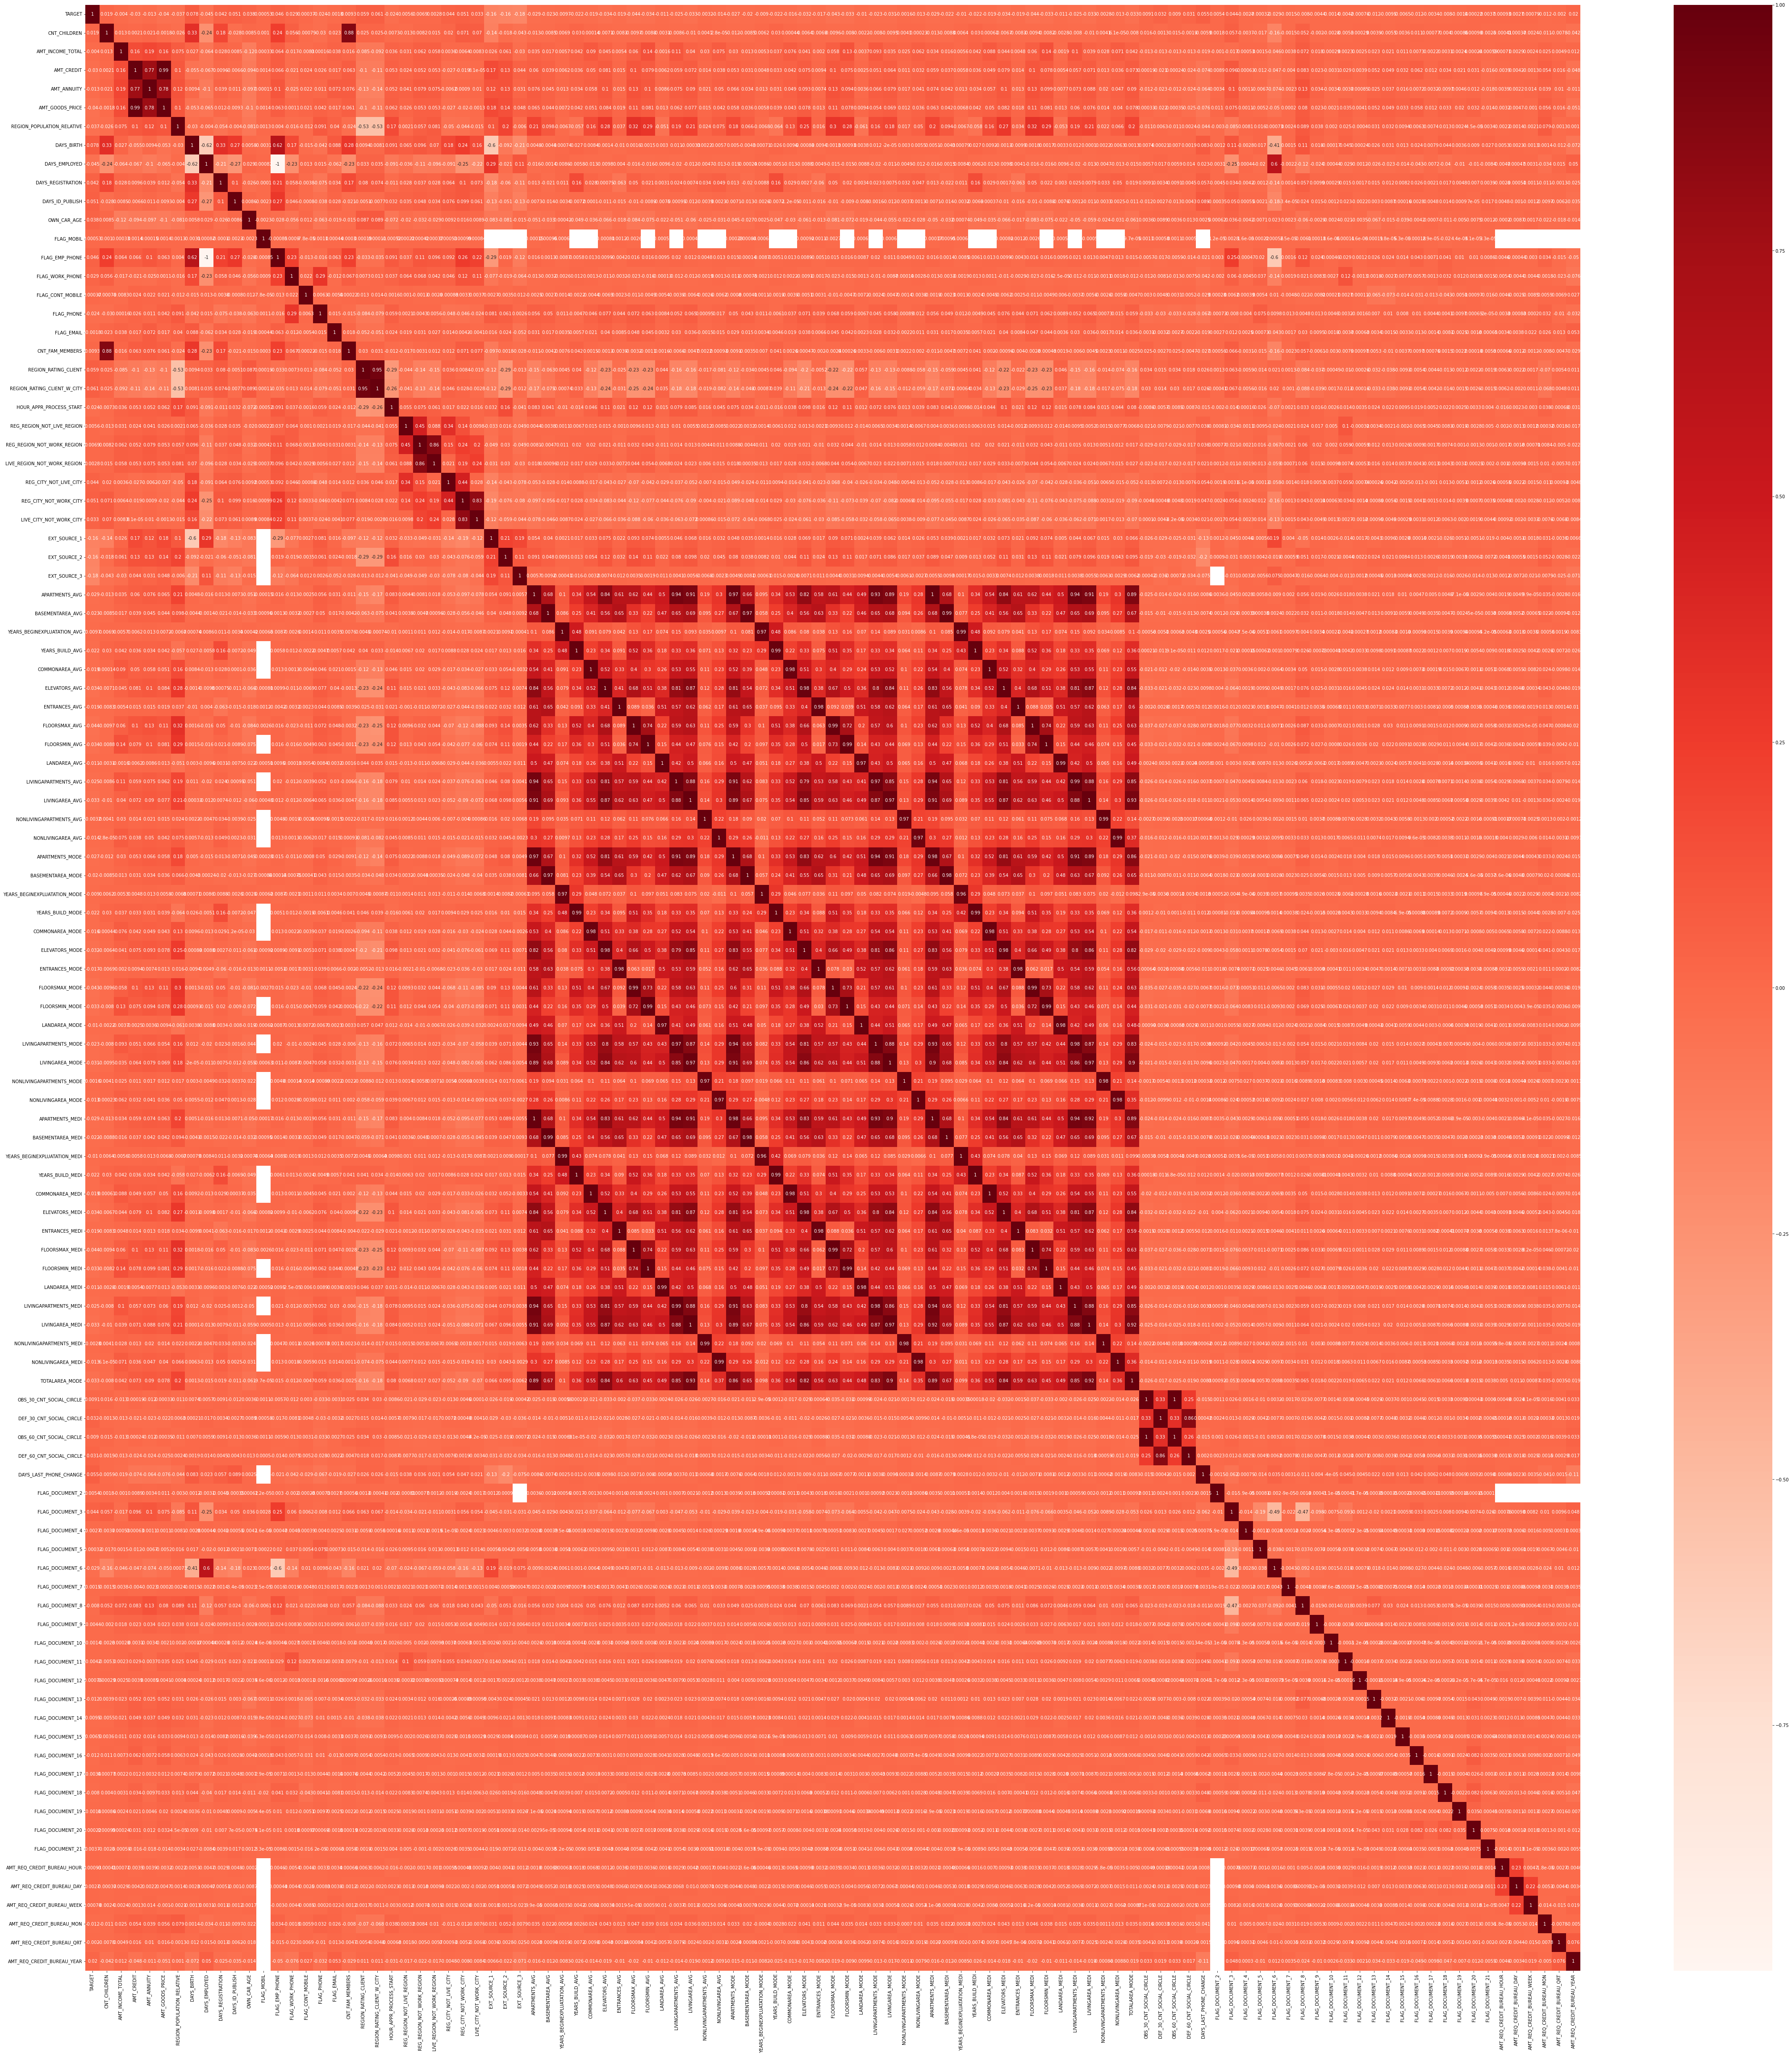

In [9]:
from matplotlib.pyplot import figure

figure(figsize=(75, 81))
sns.heatmap(traindata.iloc[:, 1:].corr(), annot=True, cmap = 'Reds')

In [35]:
correlations = traindata.iloc[:, 1:].corr()

ValueError: could not convert string to float: 'Cash loans'

Choosing and deleting strongly correlated features

In [ ]:
colarray = []
for i in range(len(correlations)):
    for j in range(i + 1, len(correlations)):
        if correlations.iloc[i,j] > 0.9:
            colarray.append(j)
colarray

In [ ]:
colarray = list(set(colarray))
colarray

In [ ]:
colstodelete = list(correlations.columns[colarray])
colstodelete

In [ ]:
colstodelete.append("SK_ID_CURR")

In [ ]:
testids = testdata["SK_ID_CURR"]
testids

In [ ]:
traindata = traindata.drop(colstodelete, axis=1)
testdata = testdata.drop(colstodelete, axis=1)

Missing values

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(traindata.isnull().sum())

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(testdata.isnull().sum())

In [ ]:
catcols = []

In [ ]:
for i, c in enumerate(traindata.columns):
    nullcount = traindata.loc[:,c].isnull().sum()
    if nullcount > 100000:
        if traindata[c].dtype == "O":
            traindata[c] = traindata[c].fillna("na")
            testdata[c] = testdata[c].fillna("na")
            catcols.append(c)
        else:
            traindata = traindata.drop(c, axis = 1)
            testdata = testdata.drop(c, axis = 1)
    else:
        if traindata[c].dtype == "O":
            traindata[c] = traindata[c].fillna(method='ffill').fillna(traindata[c].mode())
            testdata[c] = testdata[c].fillna(method='ffill').fillna(traindata[c].mode())
            catcols.append(c)
        else:
            traindata[c] = traindata[c].fillna(traindata[c].median())
            if c in testdata.columns:
                testdata[c] = testdata[c].fillna(traindata[c].median())

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(traindata.describe(include='all'))

One-hot encoding of categorical features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', drop='if_binary')
newcatcols = []
for c in catcols:
    unique = traindata[c].unique()
    if (len(unique)<=2):
        newcatcols.append(c+"_enc")
    else:
        for u in unique:
            newcatcols.append(c + "_" + u)
traindata[newcatcols] = pd.DataFrame(enc.fit_transform(traindata[catcols]).toarray(), columns=newcatcols)
testdata[newcatcols] = pd.DataFrame(enc.transform(testdata[catcols]).toarray(), columns=newcatcols)

In [ ]:
pd.options.display.max_columns = None
traindata.head()

In [ ]:
traindata = traindata.drop(catcols, axis=1)
testdata = testdata.drop(catcols, axis=1)

In [ ]:
traindata.head()

Normilizing features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
for c in traindata.columns:
    if c not in newcatcols and c != "TARGET":
        scaler = StandardScaler()
        scaler = scaler.fit(traindata[c].values.reshape(-1, 1))
        traindata[c] = scaler.transform(traindata[c].values.reshape(-1, 1))
        testdata[c] = scaler.transform(testdata[c].values.reshape(-1, 1))

Sets split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
traindata, valdata = train_test_split(traindata, test_size=0.05)

In [ ]:
X_train, y_train = traindata.drop("TARGET", axis=1), traindata["TARGET"]
X_val, y_val = valdata.drop("TARGET", axis=1), valdata["TARGET"]
X_test = testdata

Use Decision tree to predict probabilities for validation set. Find and use roc_auc_score metric to evaluate this decision

In [ ]:
from sklearn import tree
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# y_val_pred = clf.predict_proba(X_val)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_val, y_val_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(solver="liblinear")
# clf = clf.fit(X_train, y_train)
# y_val_pred = clf.predict_proba(X_val)[:, 1]
# roc_auc_score(y_val, y_val_pred)

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifiers = [
    ("Tree", tree.DecisionTreeClassifier()), 
    ("Log regression", LogisticRegression(solver="liblinear")),
#     ("SVC lin", SVC(gamma='auto', kernel = 'linear')),
#     ("SVC poly", SVC(gamma='auto', kernel = 'poly')),
#     ("SVC rbf", SVC(gamma='auto', kernel = 'rbf')),
    ("SGD", SGDClassifier(penalty="l2", loss="log")),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    #("GPC", GaussianProcessClassifier(kernel=RBF(1.0))),
    ("GNB", GaussianNB()),
    ("Ada", AdaBoostClassifier(n_estimators=100)),
    ("RandFor", RandomForestClassifier(n_estimators=10))
]

In [ ]:
for classname, classifier in classifiers:
    classifier = classifier.fit(X_train[:40000], y_train[:40000])
    y_train_pred = classifier.predict_proba(X_train[:40000])[:,1]
    y_val_pred = classifier.predict_proba(X_val)[:,1]
    print(classname + ": Train score = " 
          + str(roc_auc_score(y_train[:40000], y_train_pred).round(5)) + ", val score = " 
          + str(roc_auc_score(y_val, y_val_pred).round(5)))
    

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
from scipy.stats import uniform

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")

In [ ]:
clf = LogisticRegression(max_iter=300)

param_dist = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": loguniform(1e-3, 1e1),
    "solver": ["liblinear", "saga"]
}

random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=20, scoring="roc_auc"
)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

In [ ]:
clf = AdaBoostClassifier()

param_dist = {
    "n_estimators": list(range(40, 200)),
    "learning_rate": loguniform(0.01, 1.0),
    "algorithm": ['SAMME', 'SAMME.R']
}

random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=10, scoring="roc_auc"
)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

In [ ]:
clf = SGDClassifier()

param_dist = {
    "loss": ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    "penalty":['l2', 'l1', 'elasticnet'],
    "alpha": loguniform(1e-6, 1e-2),
    "l1_ratio": loguniform(0.1, 0.3),
    "epsilon":loguniform(1e-2, 0.3),
    "learning_rate": ['optimal','invscaling', 'adaptive'],
    "eta0": loguniform(1e-4, 1.0)
}

random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=20, scoring="roc_auc"
)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

In [ ]:
classifier = AdaBoostClassifier(n_estimators= 101, learning_rate= 0.82792, algorithm= 'SAMME.R')
classifier = classifier.fit(X_train, y_train)
y_train_pred = classifier.predict_proba(X_train)[:,1]
y_val_pred = classifier.predict_proba(X_val)[:,1]
print("Train score = " 
      + str(roc_auc_score(y_train, y_train_pred).round(5)) + ", val score = " 
      + str(roc_auc_score(y_val, y_val_pred).round(5)))

In [ ]:
y_test_pred = classifier.predict_proba(X_test)[:,1]
y_test_pred

In [ ]:
result = pd.DataFrame({"SK_ID_CURR": testids, "TARGET": y_test_pred})
result

In [ ]:
result.to_csv("/kaggle/working/ada1.csv", index=False)

My test score: 0.72560